## AllLife Credit Card Customer Segmentation Background: 

AllLife Bank wants to focus on its credit card customer base in the next financial  year.  They  have  been  advised  by  their  marketing  research  team,  that  the penetration  in  the  market  can  be  improved. Based  on  this  input,  the  Marketing  team proposes to run personalised campaigns to target new customers as well as upsell to existing  customers.  Another  insight from  the market  research  was  that  the  customers perceive the support services of the bank poorly. Based on this, the Operations team wants  to  upgrade  the  service  delivery  model,  to  ensure  that  customers  queries  are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.
### Key Questions:
1.How many different segments of customers are there? <br>
2.How are these segments different from each other?<br>
3.What  are  your recommendations  to  the  bank  on  how  to  better  market  to  and service these customers?<br>

### Data Description: 
Data is of various customers of a bank with their credit limit, the total number of credit cards  the  customer  has,  and  different  channels  through  which the customer  has contacted  the  bank  for  any  queries,  different  channels  include  visiting  the  bank, online and through a call centre. 

## Index

- <a href = #link1> Exploratory Data Analysis (EDA) </a>
- <a href = #link2> K-means Clustering </a>
- <a href = #link3> Hierarchical Clustering </a>
- <a href = #link4> Clusters Comparison </a>
- <a href = #link5> Conclusion and Business Recommendations </a>

In [1]:
#Library to supress warnings:
import warnings
warnings.filterwarnings("ignore")

#Data manipulation:
import pandas as pd
import numpy as np

#Visualization:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#modeling
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans
from scipy.stats import zscore
import yellowbrick

#clustering
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from scipy.spatial.distance import pdist
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from scipy.cluster.hierarchy import dendrogram, linkage,cophenet
from sklearn.cluster import AgglomerativeClustering 

## <a id = "link1"></a> Exploratory Data Analysis (EDA)

In [2]:
data=pd.read_excel("Credit Card Customer Data.xlsx",sheet_name="Sheet1")

In [3]:
data.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [5]:
data.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [6]:
data.duplicated().sum()

0

In [7]:
data.nunique()

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

In [8]:
data['Customer Key'].value_counts()

50706    2
37252    2
97935    2
96929    2
47437    2
        ..
58708    1
92501    1
33110    1
92503    1
75775    1
Name: Customer Key, Length: 655, dtype: int64

In [9]:
repeats = [50706, 37252, 97935, 96929, 47437]
data.loc[data['Customer Key'].isin(repeats)].sort_values(by = 'Customer Key')

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
48,49,37252,6000,4,0,2,8
432,433,37252,59000,6,2,1,2
4,5,47437,100000,6,0,12,3
332,333,47437,17000,7,3,1,0
411,412,50706,44000,4,5,0,2
541,542,50706,60000,7,5,2,2
391,392,96929,13000,4,5,0,0
398,399,96929,67000,6,2,2,2
104,105,97935,17000,2,1,2,10
632,633,97935,187000,7,1,7,0


#### Note:
Dropping columns 'Sl_No' and 'Customer Key' (assuming that several repeating keys belong to different customers since the data is not duplicated).

In [10]:
data = data.drop(['Sl_No','Customer Key'], axis = 1)

In [11]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.0,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.0,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.0,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.0,3.0,5.0,10.0


#### Univariate Analysis

In [12]:
all_col = data.columns.tolist()

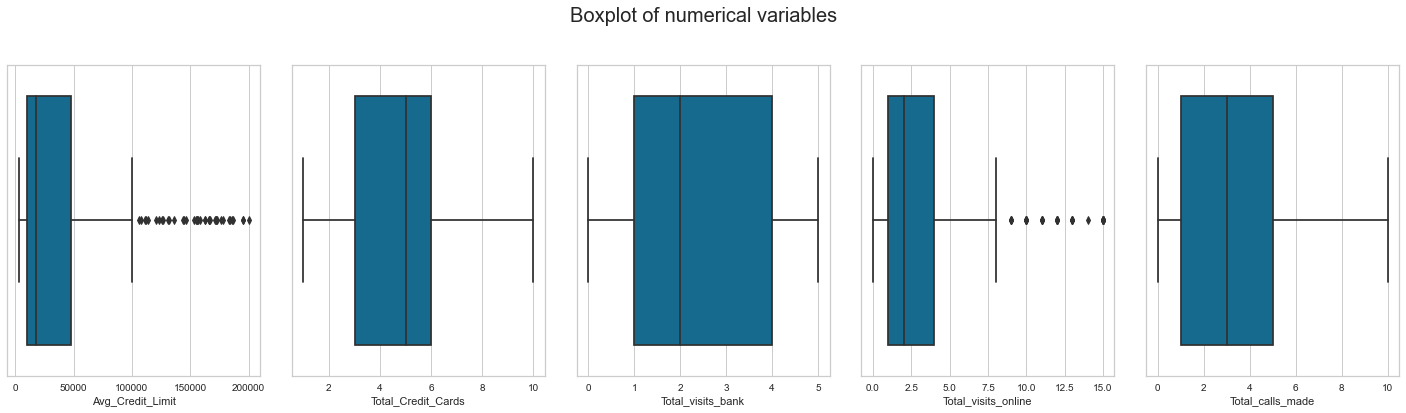

In [13]:
fig, axes = plt.subplots(1, 5,  figsize=(20, 6))
fig.suptitle('Boxplot of numerical variables', fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],x=data[all_col[counter]])
    counter = counter+1

fig.tight_layout(pad=2.0)

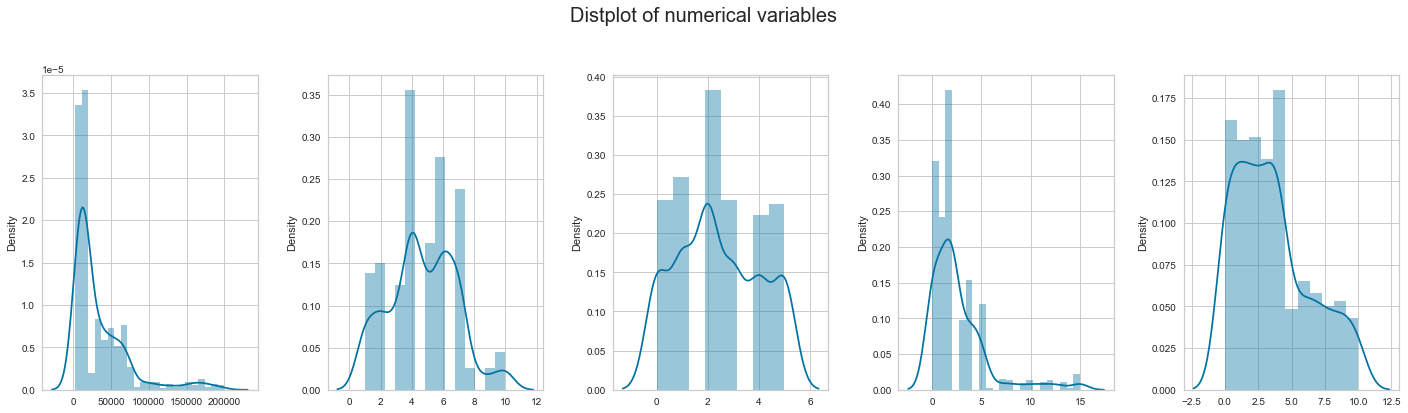

In [14]:
fig, axes = plt.subplots(1, 5,  figsize=(20, 6))
fig.suptitle('Distplot of numerical variables', fontsize=20)
counter = 0
for ii in range(5):
    sns.distplot(ax=axes[ii],x=data[all_col[counter]])
    counter = counter+1

fig.tight_layout(pad=2.0)

#### Note:
- There are upper outliers in the average credit limit, which indicates wealthy customers with established credit.
- Majority of customers visit the bank online 1-4 times with some customers clearly preferring online banking as there are upper outliers in the total visits online.
- Maximum total credit cards is 10.
- Majority of the customers visit the bank in person between 1-4 times
- Majority of customers call the bank 1-5 times.

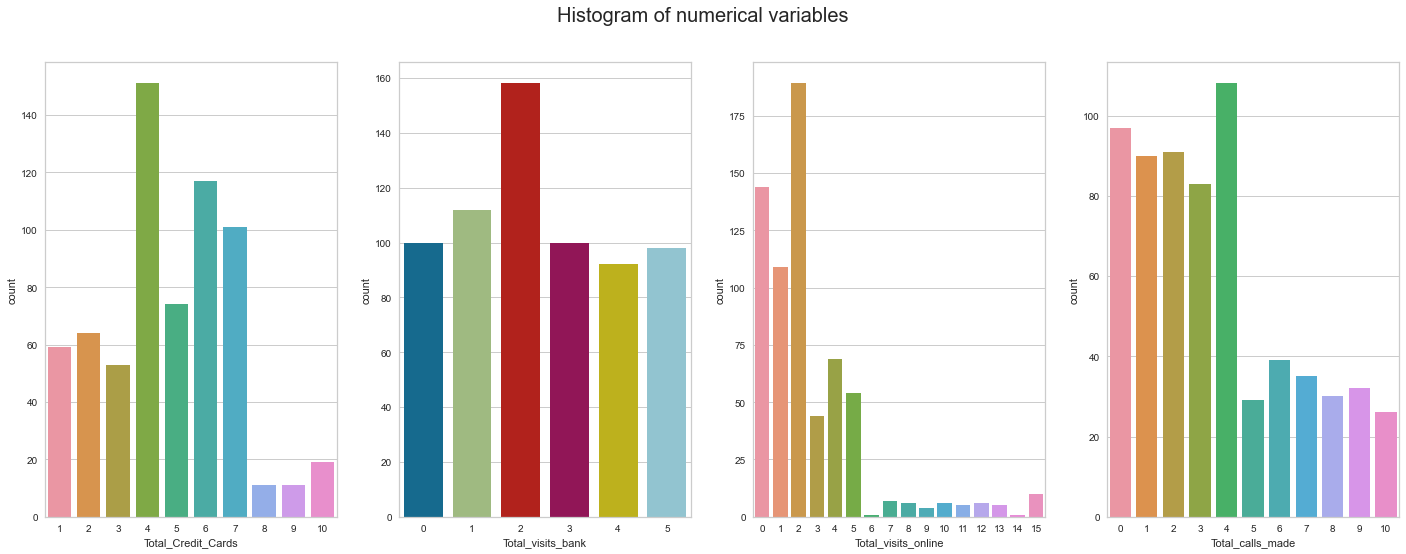

In [15]:
all_col2 = all_col[1:5]
fig, axes = plt.subplots(1, 4,  figsize=(20, 8))
fig.suptitle('Histogram of numerical variables', fontsize=20)
counter = 0
for ii in range(4):
    sns.countplot(ax=axes[ii],x=data[all_col2[counter]])
    counter = counter+1

fig.tight_layout(pad=2.0)

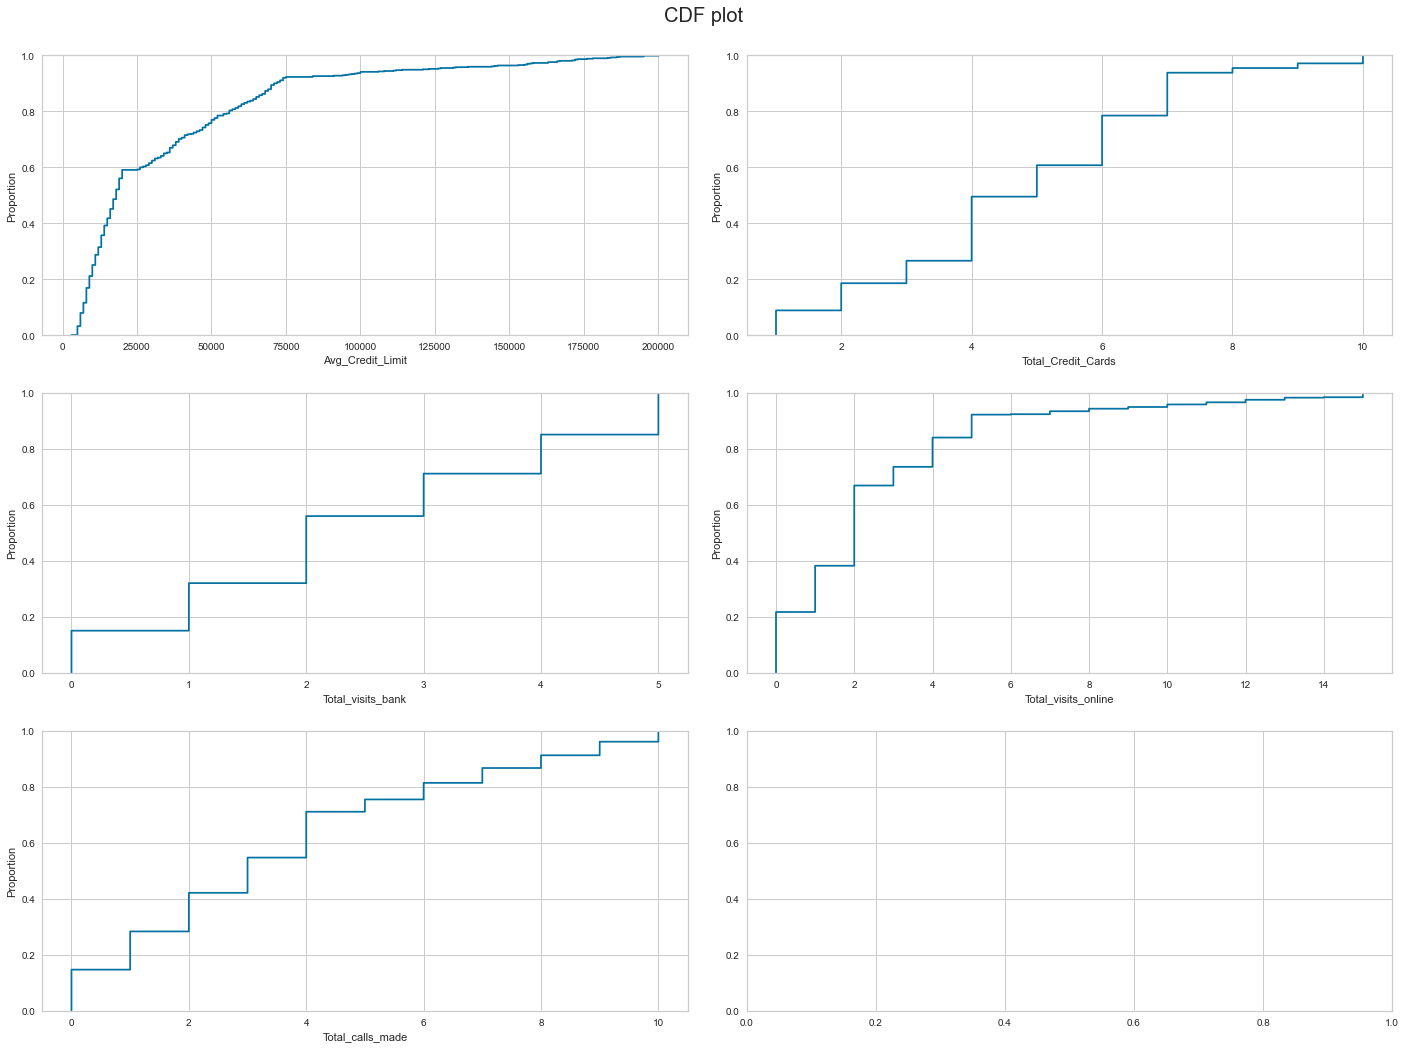

In [16]:
fig, axes = plt.subplots(3, 2,  figsize=(20, 15))
fig.suptitle('CDF plot', fontsize=20)
counter = 0
for ii in range(3):
    sns.ecdfplot(ax=axes[ii][0],x=data[all_col[counter]])
    counter = counter+1
    if counter != 5:
        sns.ecdfplot(ax=axes[ii][1],x=data[all_col[counter]])
        counter = counter+1
    else:
        pass


fig.tight_layout(pad=2.0)

#### Note:
- 90% of the customers have average credit limit less than $75K.
- 95% of the customers have less than 7 credit cards.
- Less than 20% of customers never visit the bank. All other customers visit the bank anywhere between 1 and 5 times.  
- 90% of the customers visit the bank online around 5 times.
- Less than 20% of the customers never call the bank. All other customers call between 1 and 10 times.

#### Bivariate Analysis

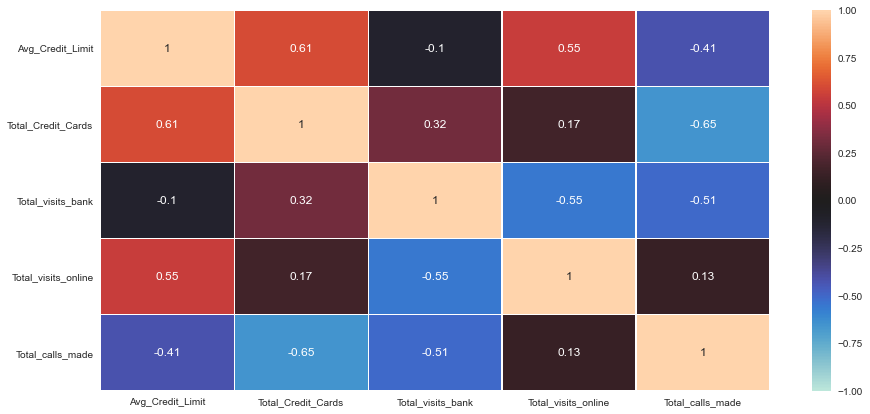

In [17]:
plt.figure(figsize=(15,7))

sns.heatmap(data[all_col].corr(),
            annot=True,
            linewidths=0.5,vmin=-1,vmax=1,
            center=0,
            cbar=True,)

plt.show()

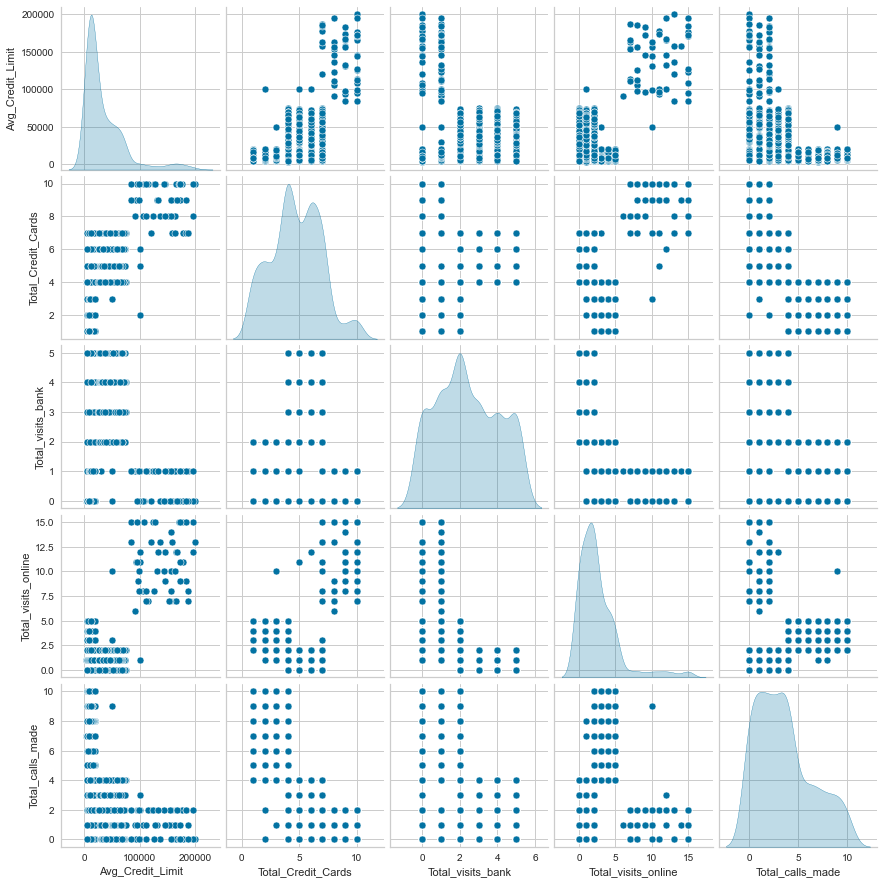

In [18]:
sns.pairplot(data[all_col],diag_kind="kde")

<AxesSubplot:xlabel='Avg_Credit_Limit', ylabel='Total_visits_bank'>

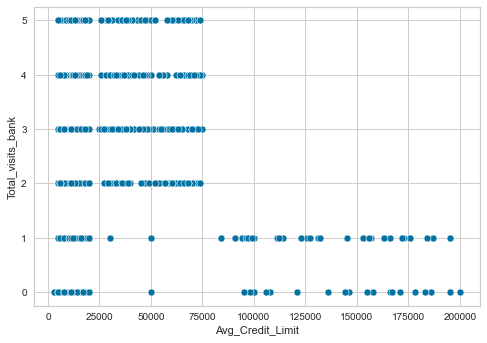

In [19]:
sns.scatterplot(x=data.Avg_Credit_Limit,y=data.Total_visits_bank)

<AxesSubplot:xlabel='Avg_Credit_Limit', ylabel='Total_visits_online'>

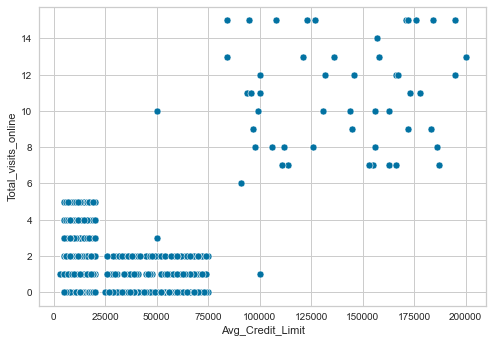

In [20]:
sns.scatterplot(x=data.Avg_Credit_Limit,y=data.Total_visits_online)

#### Note:
Customers with lower credit limit visit bank more often. Customers with higher credit limit prefer using online banking instead of going to the bank in person or calling. 

## <a id = "link2"></a> K-Means Clustering

Since the K-Means algorithms is affected by presence of outliers, I am going to treat outliers using IQR score. The data will also need to be scaled.

In [21]:
Q1 = data.quantile(0.25)             
Q3 = data.quantile(0.75)

IQR = Q3 - Q1                          

lower=Q1-1.5*IQR                        
upper=Q3+1.5*IQR

((data.select_dtypes(include=['float64','int64'])<lower) | (data.select_dtypes(include=['float64','int64'])>upper)).sum()/len(data)*100

Avg_Credit_Limit       5.909091
Total_Credit_Cards     0.000000
Total_visits_bank      0.000000
Total_visits_online    5.606061
Total_calls_made       0.000000
dtype: float64

In [22]:
data_out = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)] # rows without outliers
data_treated = data.copy()

# Replace every outlier on the lower side by the lower whisker
for i, j in zip(np.where(data_treated < Q1 - 1.5 * IQR)[0], np.where(data_treated < Q1 - 1.5 * IQR)[1]): 
    
    whisker  = Q1 - 1.5 * IQR
    data_treated.iloc[i,j] = whisker[j]
    
    
#Replace every outlier on the upper side by the upper whisker    
for i, j in zip(np.where(data_treated > Q3 + 1.5 * IQR)[0], np.where(data_treated > Q3 + 1.5 * IQR)[1]):
    
    whisker  = Q3 + 1.5 * IQR
    data_treated.iloc[i,j] = whisker[j]   

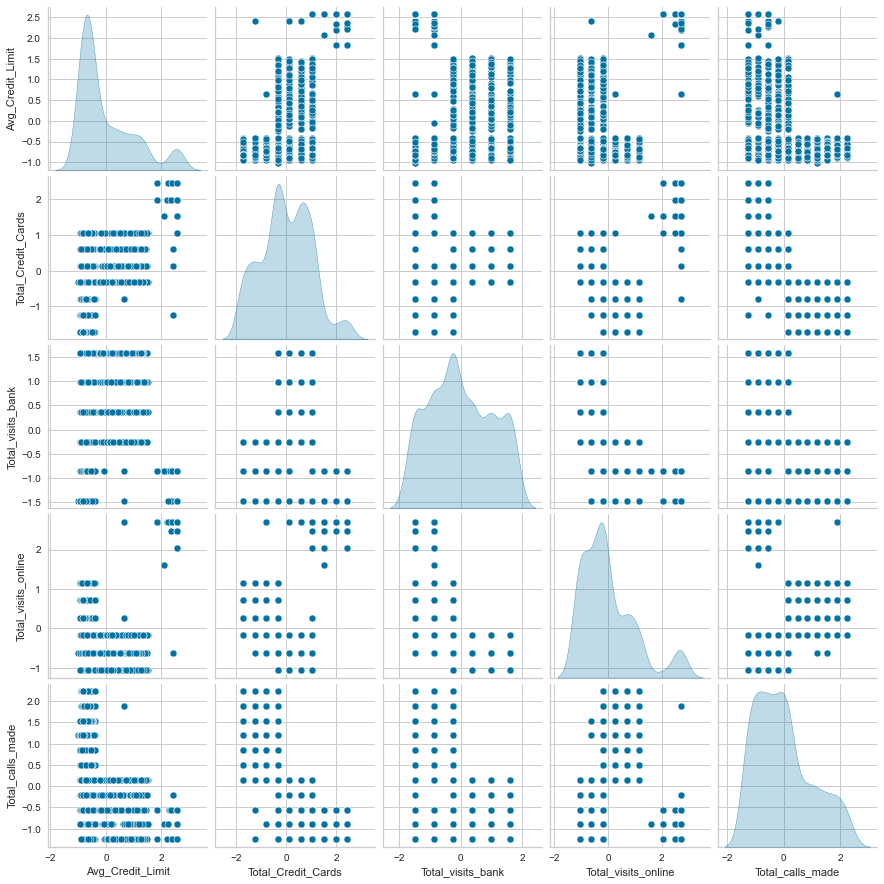

In [23]:
data_k = data_treated.copy()
data_kscaled=data_k.apply(zscore) #scaling the data
sns.pairplot(data_kscaled,diag_kind='kde')

#### Elbow Curve 

Number of Clusters: 1 	Average Distortion: 2.0731463576129583
Number of Clusters: 2 	Average Distortion: 1.498614150179638
Number of Clusters: 3 	Average Distortion: 1.1823298853410937
Number of Clusters: 4 	Average Distortion: 1.0711026440504197
Number of Clusters: 5 	Average Distortion: 1.0048977741354534
Number of Clusters: 6 	Average Distortion: 0.9519492313650114
Number of Clusters: 7 	Average Distortion: 0.9147967873107548
Number of Clusters: 8 	Average Distortion: 0.8932413827943048
Number of Clusters: 9 	Average Distortion: 0.872751585670412


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

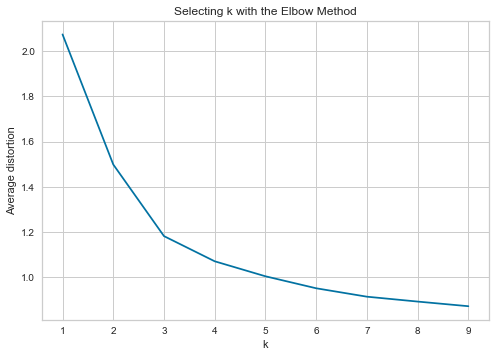

In [24]:
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(data_kscaled)
    prediction=model.predict(data_kscaled)
    distortion=sum(np.min(cdist(data_kscaled, model.cluster_centers_, 'euclidean'), axis=1)) / data_kscaled.shape[0]
                           
    meanDistortions.append(distortion)

    print('Number of Clusters:', k, '\tAverage Distortion:', distortion)

plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')


#### Note:
Based on the elbow curve, the appropriate number of clusters seems to be 2 or 3.

For n_clusters = 2, silhouette score is 0.4201583924929177)
For n_clusters = 3, silhouette score is 0.5169867470092899)
For n_clusters = 4, silhouette score is 0.38147048130671246)
For n_clusters = 5, silhouette score is 0.35332888701008774)
For n_clusters = 6, silhouette score is 0.2714571365538618)
For n_clusters = 7, silhouette score is 0.2675689802468792)
For n_clusters = 8, silhouette score is 0.2537118916225433)
For n_clusters = 9, silhouette score is 0.24857640462298453)


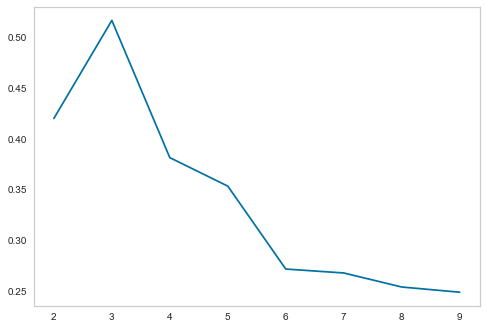

In [25]:
sil_score = []
cluster_list = list(range(2,10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((data_kscaled))
    score = silhouette_score(data_kscaled, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list,sil_score)
plt.grid()

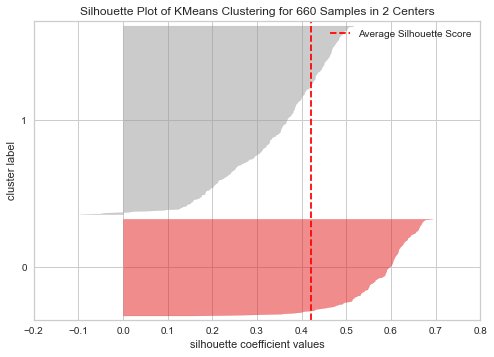

In [26]:
visualizer = SilhouetteVisualizer(KMeans(2, random_state = 1))
visualizer.fit(data_kscaled)    
visualizer.show();

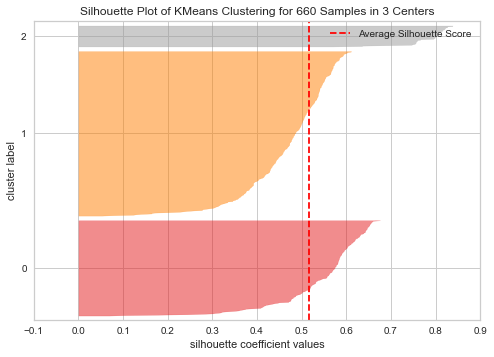

In [27]:
# Finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state = 1))
visualizer.fit(data_kscaled)    
visualizer.show();

#### Note:
The silhouette score is higher for 3 clusters (~0.52). Therefore, the value of k is going to be 3.

In [28]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(data_kscaled)

KMeans(n_clusters=3, random_state=0)

In [29]:
data_k['K_means_segments'] = kmeans.labels_
data_kscaled['K_means_segments'] = kmeans.labels_

In [30]:
k_means_cluster_profile = data_k.groupby('K_means_segments').mean()

In [31]:
k_means_cluster_profile

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
K_means_segments,,,,,
0,33782.383420,5.515544,3.489637,0.981865,2.000000
1,12174.107143,2.410714,0.933036,3.546875,6.870536
2,102660.000000,8.740000,0.600000,8.180000,1.080000


In [32]:
k_means_cluster_profile['count_in_each_segments'] = data_k.groupby('K_means_segments')['Total_calls_made'].count().values

In [33]:
k_means_cluster_profile.style.highlight_max(color = 'lightgreen', axis = 0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
K_means_segments,,,,,,
0,33782.383420,5.515544,3.489637,0.981865,2.000000,386
1,12174.107143,2.410714,0.933036,3.546875,6.870536,224
2,102660.000000,8.740000,0.600000,8.180000,1.080000,50


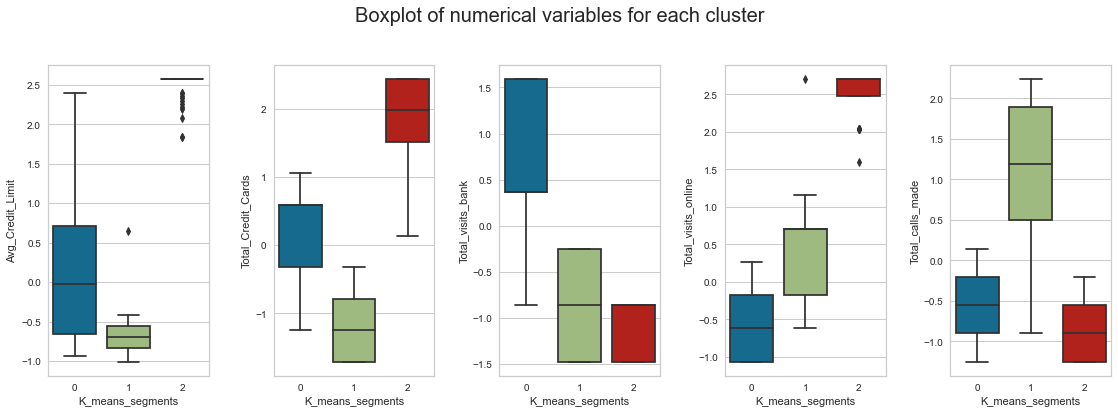

In [34]:
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster', fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=data_kscaled[all_col[counter]],x=data_kscaled['K_means_segments'])
    counter = counter+1

fig.tight_layout(pad=2.0)

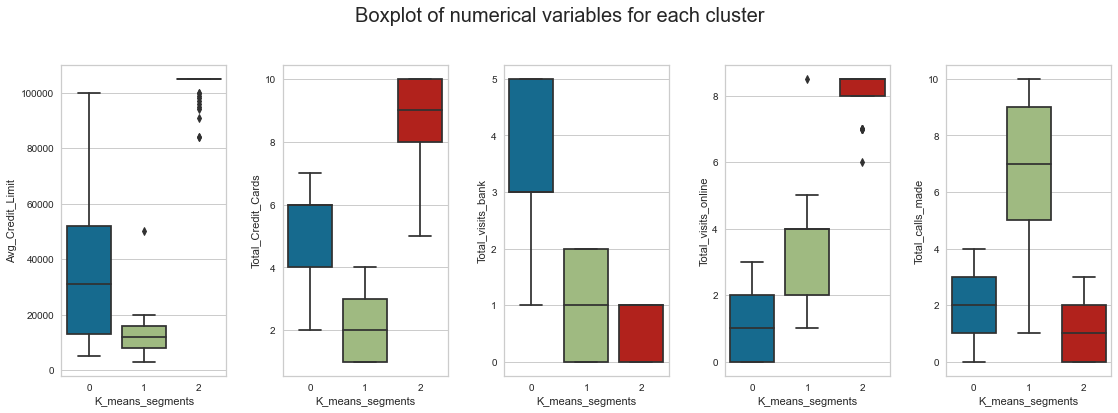

In [35]:
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Boxplot of numerical variables for each cluster', fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=data_k[all_col[counter]],x=data_k['K_means_segments'])
    counter = counter+1

fig.tight_layout(pad=2.0)

### Insights

- **Cluster 0**:
    - This is the biggest customer group with average credit limit of approximately $34K. 
    - Customers in this group have 5-6 total credit cards on average.
    - Customers in this group prefer to visit the bank in person instead of calling or using the website.
   
- **Cluster 1**:
    - This is the second biggest group of customers that is characterized by lower average credit limit (around $12K).
    - Customers in this group have only 2-3 credit cards on average.
    - Customers in this group prefer calling the bank instead of visiting the bank in person or using the website.
    
- **Cluster 2**:
   - This is the the smallest and the most affluent group of customers with average credit limit of $103K. 
    - Customers in this group have 8-9 total credit cards on average.
    - Customers in this group are tech savvy and prefer using the website instead of visiting the bank in person or calling.
    

## <a id = "link3"></a> Hierarchical Clustering

In [36]:
data_h = data_treated.copy()
datascaled_h=data_h.apply(zscore)

In [37]:
distance_metrics = [ 'euclidean','chebyshev','mahalanobis','cityblock']
linkage_methods = ['single', 'complete', 'average', 'weighted']
high_cophenet_corr = 0
high_dm_lm = [0,0]
for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(datascaled_h, metric=dm, method=lm)
        c, coph_dists = cophenet(Z , pdist(datascaled_h))
        print('Cophent correlation for distance metrics {} and linkage method {} is {}'.format(dm,lm,c))
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm
print('Highest cophenet correlation is {}, obtinaed with {} distance metric and {} linkage method'.format(high_cophenet_corr ,high_dm_lm[0],high_dm_lm[1]))         

Cophent correlation for distance metrics euclidean and linkage method single is 0.6666982080229052
Cophent correlation for distance metrics euclidean and linkage method complete is 0.8207884321476555
Cophent correlation for distance metrics euclidean and linkage method average is 0.8926672966587861
Cophent correlation for distance metrics euclidean and linkage method weighted is 0.8872365340578665
Cophent correlation for distance metrics chebyshev and linkage method single is 0.6882876568342585
Cophent correlation for distance metrics chebyshev and linkage method complete is 0.7672199195985938
Cophent correlation for distance metrics chebyshev and linkage method average is 0.8907216945489854
Cophent correlation for distance metrics chebyshev and linkage method weighted is 0.782728724334691
Cophent correlation for distance metrics mahalanobis and linkage method single is 0.658393428048562
Cophent correlation for distance metrics mahalanobis and linkage method complete is 0.3884943792102

In [38]:
linkage_methods = ['centroid','median','ward']
high_cophenet_corr = 0
high_dm_lm = [0,0]

for lm in linkage_methods:
    Z = linkage(datascaled_h, metric='euclidean', method=lm)
    c, coph_dists = cophenet(Z , pdist(datascaled_h))
    print('Cophent correlation for distance metrics {} and linkage method {} is {}'.format('euclidean',lm,c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = dm
        high_dm_lm[1] = lm
print('*'*110)
print('Highest cophenet correlation is {}, obtinaed with {} distance metric and {} linkage method'.format(high_cophenet_corr ,high_dm_lm[0],high_dm_lm[1]))

Cophent correlation for distance metrics euclidean and linkage method centroid is 0.8880634847869346
Cophent correlation for distance metrics euclidean and linkage method median is 0.8887160179419454
Cophent correlation for distance metrics euclidean and linkage method ward is 0.7702265240776373
**************************************************************************************************************
Highest cophenet correlation is 0.8887160179419454, obtinaed with cityblock distance metric and median linkage method


#### Note:
Cophenet index is at maximum (0.8926) with euclidean distance metric and average linkage method. 

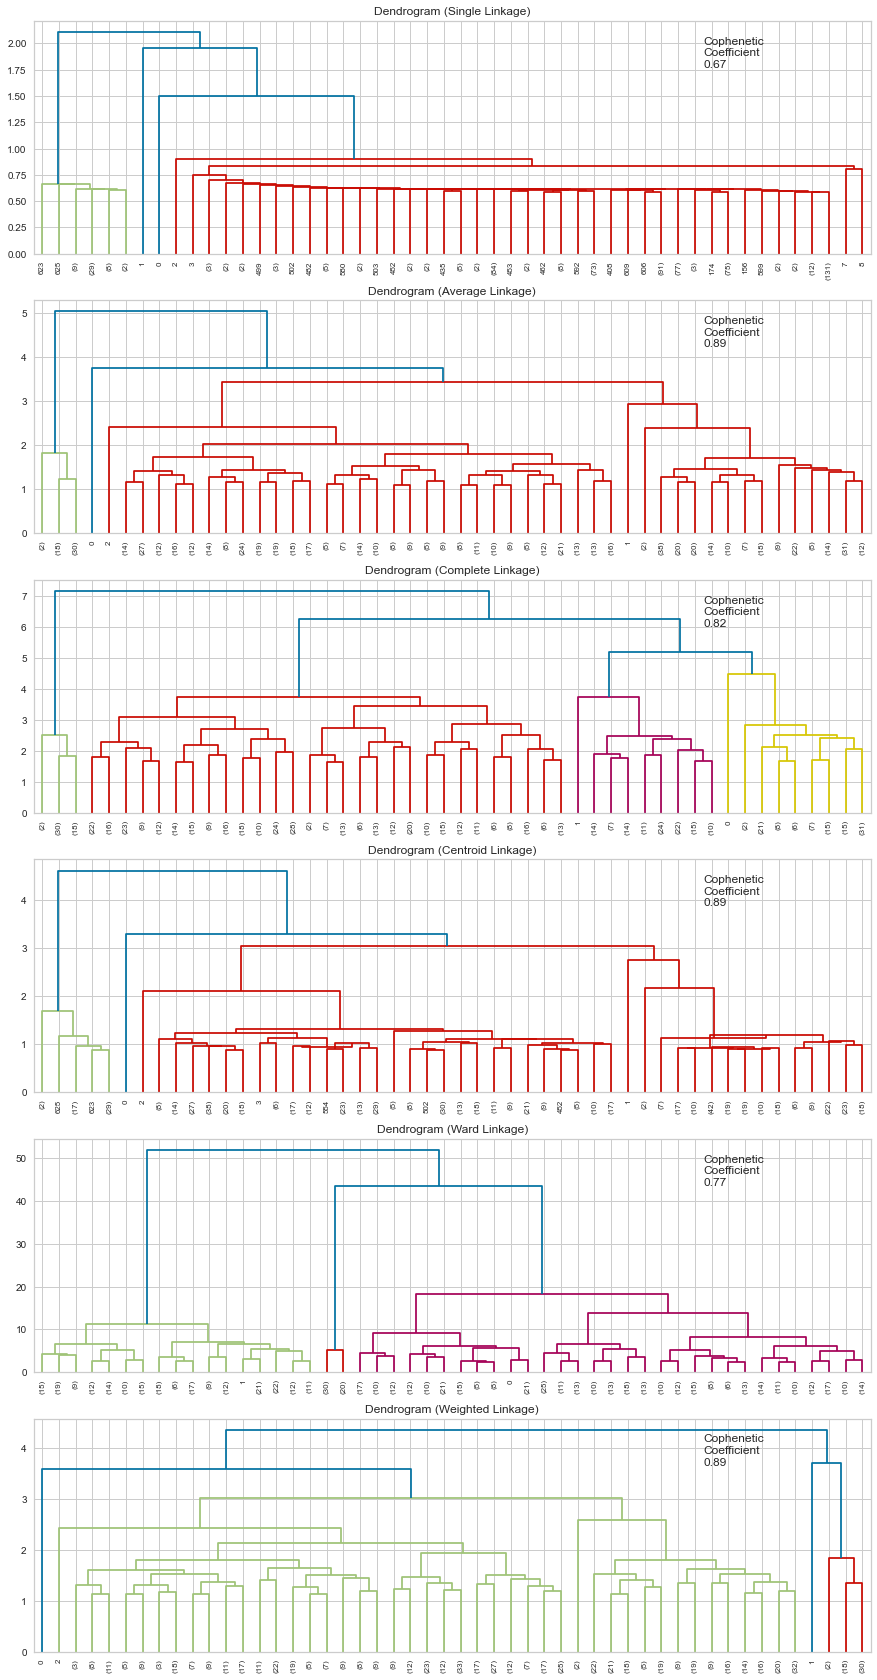

In [39]:
methods = ['single',
           'average', 
           'complete',
           'centroid',
           'ward',
          'weighted']

compare_cols = ['Linkage', 'Cophenetic Coefficient']
compare = []

fig, axs = plt.subplots(len(methods), 1, figsize=(15, 30))
for i, method in enumerate(methods):
    
    Z = linkage(datascaled_h, metric='euclidean', method=method)

    dendrogram(Z, truncate_mode='lastp', p=50,  ax=axs[i]);
    axs[i].set_title(f'Dendrogram ({method.capitalize()} Linkage)')
    coph_corr, coph_dist = cophenet(Z, pdist(datascaled_h))
    axs[i].annotate(f'Cophenetic\nCoefficient\n{coph_corr:0.2f}', 
                    (0.80, 0.80),
                    xycoords='axes fraction')
    compare.append([method, coph_corr])

In [40]:
coph_c = pd.DataFrame(compare, columns=compare_cols)
coph_c

,Linkage,Cophenetic Coefficient
0,single,0.666698
1,average,0.892667
2,complete,0.820788
3,centroid,0.888063
4,ward,0.770227
5,weighted,0.887237


#### Note:
Dendograms with average, complete, centroid and ward linkage show distinct clusters. Dendogram with average linkage has the highest cophonetic coefficient (0.8926).

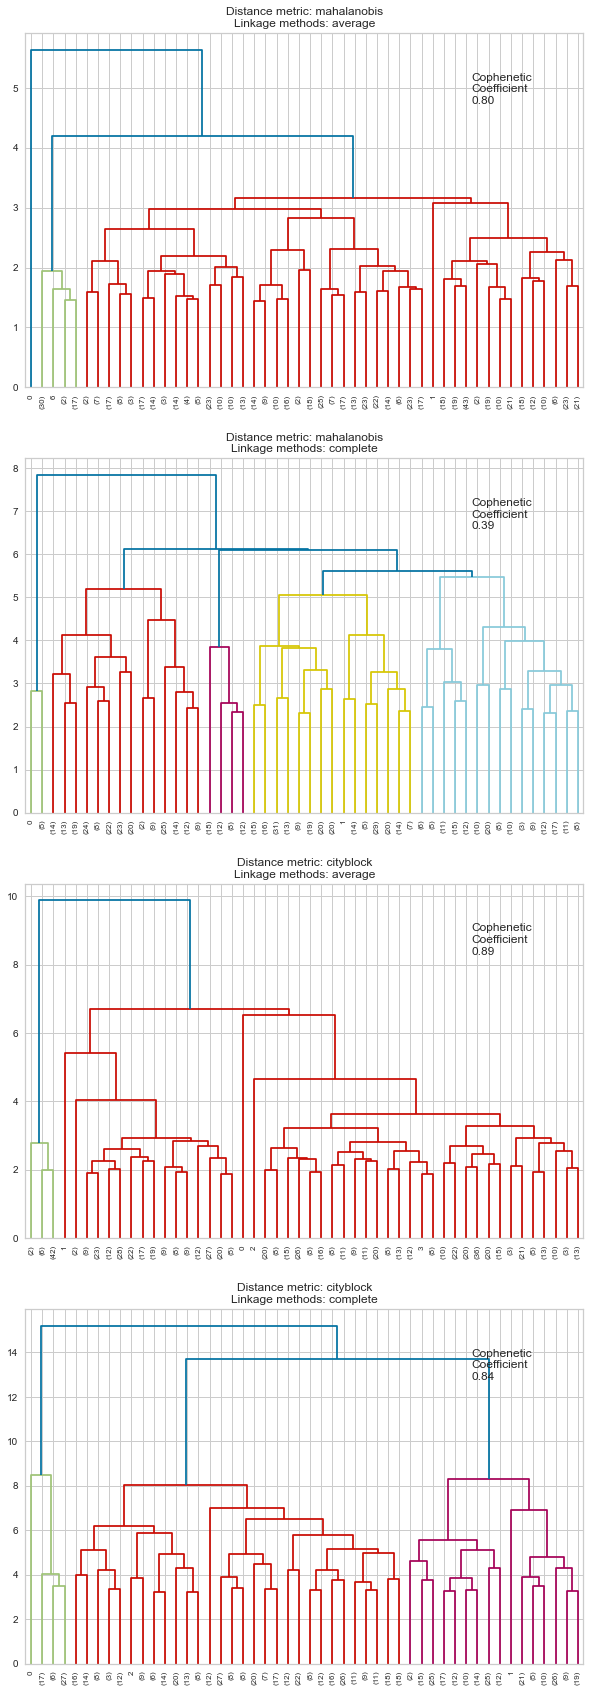

In [41]:
distance_metrics = [ 'mahalanobis','cityblock']
linkage_methods = ['average', 'complete']
compare_cols2 = ['distance_metric', 'linkage_method','Cophenetic Coefficient']
compare2 = []
fig, axs = plt.subplots(len(distance_metrics)+len(distance_metrics), 1, figsize=(10, 30))
i=0
for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(datascaled_h, metric=dm, method=lm)
        dendrogram(Z, truncate_mode='lastp', p=50,  ax=axs[i]);
        axs[i].set_title('Distance metric: {}\nLinkage methods: {}'.format(dm,lm))
        coph_corr, coph_dist = cophenet(Z, pdist(datascaled_h))
        axs[i].annotate(f'Cophenetic\nCoefficient\n{coph_corr:0.2f}', 
                        (0.80, 0.80),
                        xycoords='axes fraction')
        axs[i].set_title('Distance metric: {}\nLinkage methods: {}'.format(dm,lm))                        
        i +=1
        compare2.append([dm,lm, coph_corr])

In [42]:
coph_c2 = pd.DataFrame(compare2, columns=compare_cols2)
coph_c2

,distance_metric,linkage_method,Cophenetic Coefficient
0,mahalanobis,average,0.799861
1,mahalanobis,complete,0.388494
2,cityblock,average,0.890530
3,cityblock,complete,0.836524


#### Note:
When comparing all dendograms, then average eucledean and average cityblock provided 2 distinct clusters with high cophonetic coefficients of 0.9 .<br>
Dendograms with complete eucledean and complete cityblock provided 3 distinct clusters with high cophonetic coefficients of 0.84.<br>
I am going to analyze and plot average eucledean (with 2 clusters) and complete city block (with 3 clusters) based on dendograms and cophonetic coefficients performance.

#### Average  Eucledean (2 clusters)

In [43]:
datascaled_al = datascaled_h.copy()
AL = AgglomerativeClustering(n_clusters=2,affinity='euclidean', linkage='average')
AL.fit(datascaled_al)
datascaled_al['AL_Clusters'] = AL.labels_
data_al = data_h.copy()
data_al['AL_Clusters'] = AL.labels_
cluster_profile1 = data_al.groupby('AL_Clusters').mean()
cluster_profile1['count_in_each_segments'] = data_al.groupby('AL_Clusters')['Total_calls_made'].count().values
cluster_profile1.style.highlight_max(color = 'lightgreen', axis = 0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
AL_Clusters,,,,,,
0,25847.540984,4.375410,2.550820,1.923770,3.788525,610
1,102660.000000,8.740000,0.600000,8.180000,1.080000,50


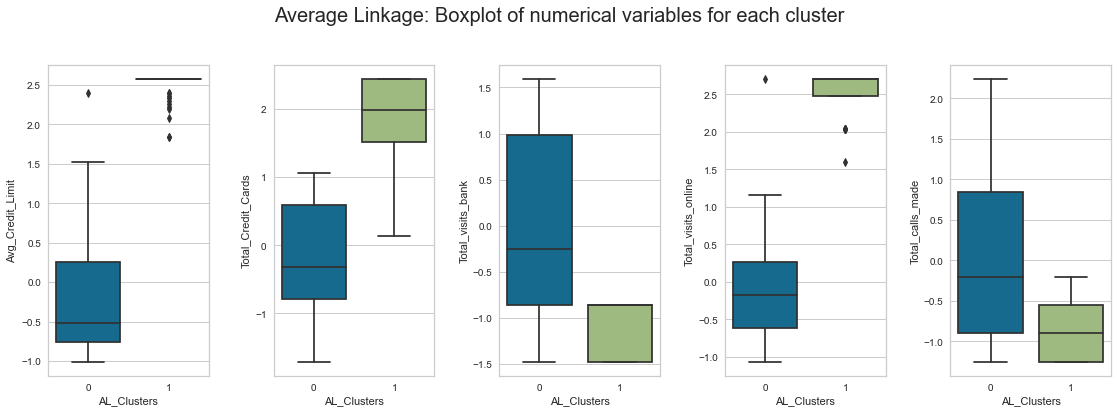

In [44]:
all_col = data_al.columns.tolist()
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Average Linkage: Boxplot of numerical variables for each cluster', fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=datascaled_al[all_col[counter]],x=datascaled_al['AL_Clusters'])
    counter = counter+1

fig.tight_layout(pad=2.0)

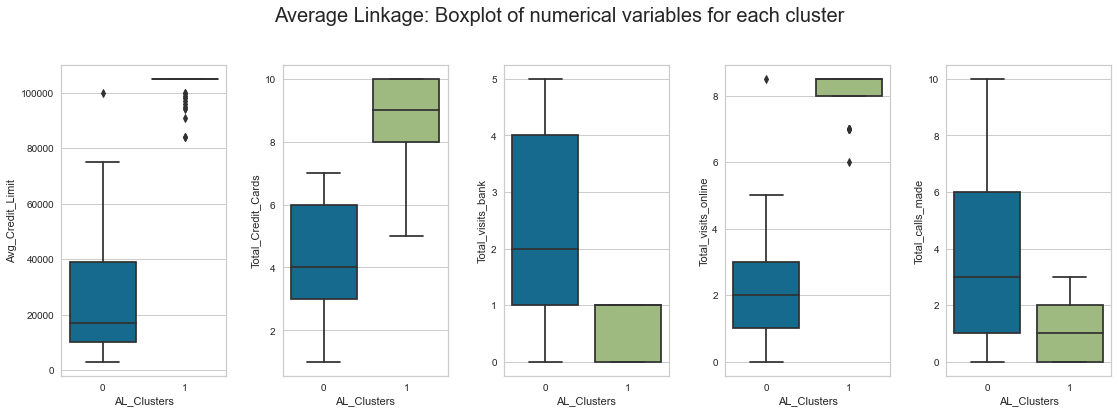

In [45]:
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Average Linkage: Boxplot of numerical variables for each cluster', fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=data_al[all_col[counter]],x=data_al['AL_Clusters'])
    counter = counter+1

fig.tight_layout(pad=2.0)

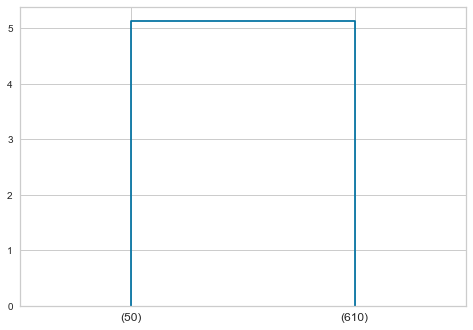

In [46]:
#Final truncated dendogram:
Z = linkage(datascaled_al, metric='euclidean', method='average')
dendrogram(
    Z,
    truncate_mode='lastp',  
    p=2,  
)
plt.show()

In [47]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, 3, criterion='distance')
from sklearn.metrics import silhouette_score
silhouette_score(datascaled_al,clusters)

0.4813076699679694

### Insights

- **Cluster 0**:
    - This is the biggest customer group with average credit limit of approximately $26K. 
    - Customers in this group have 4 total credit cards on average.
    - The order of preference of contacting the bank of this group of customers is : calling, in person followed by online banking.
   
- **Cluster 1**:
    - This is a smaller group of customers that is characterized by higher average credit limit (around $103K).
    - Customers in this group have 8-9 credit cards on average.
    - Customers in this group strongly prefer online banking to any other means of comminication.

#### Complete Cityblock (3 clusters)

In [48]:
datascaled_cocb = datascaled_h.copy()
COCB = AgglomerativeClustering(n_clusters=3,affinity='cityblock', linkage='average')
COCB.fit(datascaled_cocb)
datascaled_cocb['COCB_Clusters'] = COCB.labels_
data_cocb = data_h.copy()
data_cocb['COCB_Clusters'] = COCB.labels_
cluster_profile2 = data_cocb.groupby('COCB_Clusters').mean()
cluster_profile2['count_in_each_segments'] = data_cocb.groupby('COCB_Clusters')['Total_calls_made'].count().values
cluster_profile2.style.highlight_max(color = 'lightgreen', axis = 0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
COCB_Clusters,,,,,,
0,33713.178295,5.511628,3.485788,0.984496,2.005168,387
1,102660.000000,8.740000,0.600000,8.180000,1.080000,50
2,12197.309417,2.403587,0.928251,3.553812,6.883408,223


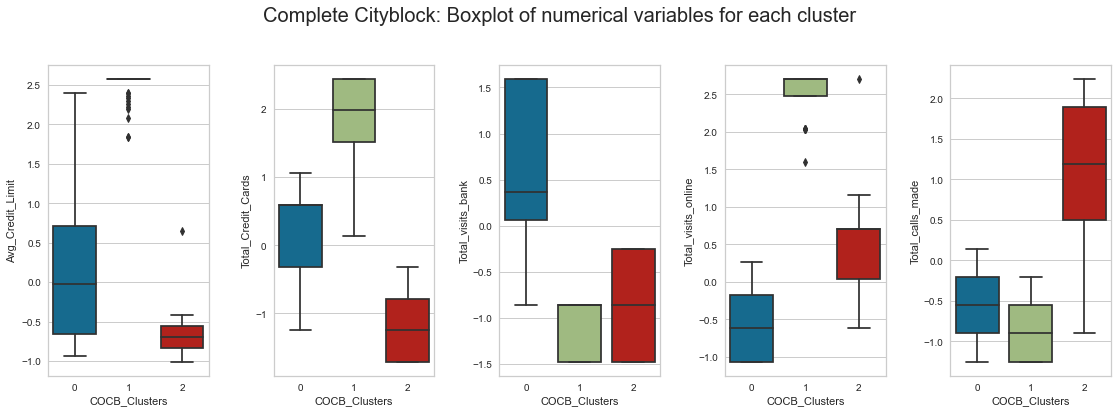

In [49]:
all_col = data_cocb.columns.tolist()
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Complete Cityblock: Boxplot of numerical variables for each cluster', fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=datascaled_cocb[all_col[counter]],x=datascaled_cocb['COCB_Clusters'])
    counter = counter+1

fig.tight_layout(pad=2.0)

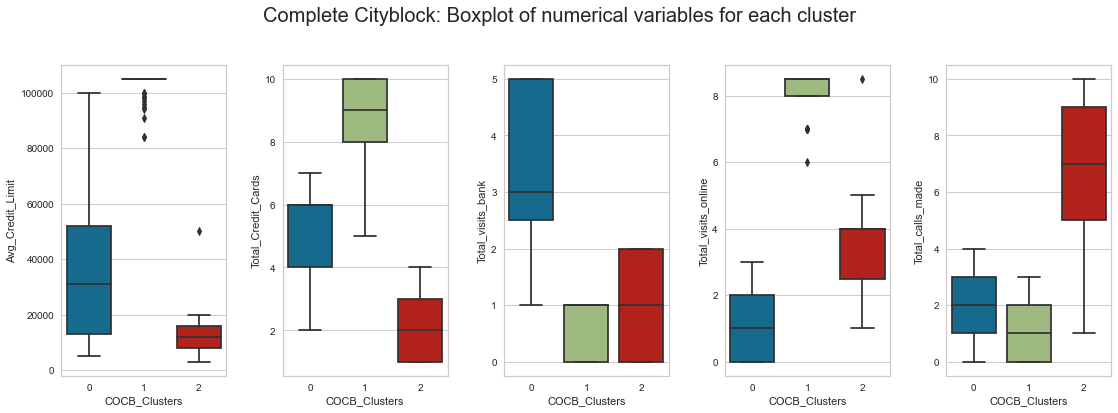

In [50]:
fig, axes = plt.subplots(1, 5,  figsize=(16, 6))
fig.suptitle('Complete Cityblock: Boxplot of numerical variables for each cluster', fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii],y=data_cocb[all_col[counter]],x=data_cocb['COCB_Clusters'])
    counter = counter+1

fig.tight_layout(pad=2.0)

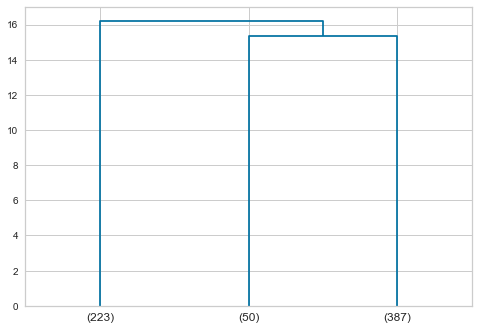

In [51]:
#Final truncated dendogram:
Z = linkage(datascaled_cocb, metric='cityblock', method='complete')
dendrogram(
    Z,
    truncate_mode='lastp',  
    p=3,  
)
plt.show()

In [52]:
from scipy.cluster.hierarchy import fcluster
clusters = fcluster(Z, 3, criterion='distance')
from sklearn.metrics import silhouette_score
silhouette_score(datascaled_cocb,clusters)

0.16952956430753852

### Insights

- **Cluster 0**:
    - This is the biggest customer group with average credit limit of approximately $34K. 
    - Customers in this group have 5-6 total credit cards on average.
    - Customers in this group prefer to visit the bank in person instead of calling or using the website.

- **Cluster 1**:
   - This is the the smallest and the most affluent group of customers with average credit limit of $103K. 
    - Customers in this group have 8-9 total credit cards on average.
    - Customers in this group are tech savvy and prefer using the website instead of visiting the bank in person or calling.
   
- **Cluster 2**:
    - This is the second biggest group of customers that is characterized by lower average credit limit (around $12K).
    - Customers in this group have only 2-3 credit cards on average.
    - Customers in this group prefer calling the bank instead of visiting the bank in person or using the website.

## <a id = "link4"></a> Clusters Comparison

3 sets of clusters were produced: <br>
- 3 clusters K-Means (silhouette score 0.52)
- 2 clusters with eucledean distance and average linkage (silhouette score 0.48)
- 3 clusters with cityblock distance and complete linkage (silhouette score 0.53)

K-Means and complete cityblock produced very similar clusters with similar silhouette scores. However, silhouette score is better when closer 1, therefore complete citiblock produced the best and the most compact clusters.

## <a id = "link5"></a> Conclusion and Business Recommendation

#### Using Clusters derived with hierarchical clustering (distance metric: cityblock, linkage method: complete):

1. **There are 3 segments of customers.**
2. **Difference between segments:**
- **Cluster 0**:
    - This is the biggest customer group with an average credit limit of approximately $34K. 
    - Customers in this group have 5-6 total credit cards on average.
    - Customers in this group prefer to visit the bank in person instead of calling or using the website.

- **Cluster 1**:
   - This is the the smallest and the most affluent group of customers with an average credit limit of $103K. 
    - Customers in this group have 8-9 total credit cards on average.
    - Customers in this group are tech savvy and prefer using the website instead of visiting the bank in person or calling.
   
- **Cluster 2**:
    - This is the second biggest group of customers that is characterized by lower average credit limit (around $12K).
    - Customers in this group have only 2-3 credit cards on average.
    - Customers in this group prefer calling the bank instead of visiting in person or using the website.
    
3. **Recommendations  to  the  bank  on  how  to  better  market  to  and service these customers:** <br>
The bank should treat these 3 group differently keeping in mind that the groups mainly differ on available resources 
and communication preferences.
- **Cluster 0**:
    The bank should anticipate high traffic inside its retail locations as this most numerous group of customers prefers handling all business in person. Therefore, it is important to ensure that the floor is staffed and the lines are kept to the minimum. <br>
    Consider having marketing displays of different services inside the bank. Also consider upselling while doing transactions. <br>
 <br>   
- **Cluster 1**:
    This is the most affluent yet the smallest group of customers. Consider targeted online advertisement and recommendations systems. The website should be polished, user friendly and be designed with upscale customers in mind because they are far more likely to use online services than any other group. <br>
 <br>
- **Cluster 2**:
   These customers have lower credit limits and possibly lower purchasing power. However, some of them might be looking into getting additional credit lines at a discount. Consider discounted credit services for this group of customers. Since these customers are more likely to call, it could be beneficial to place an advertisement about discounts on the phone system. Ensure that  phone systems such as IVR can automatically handle most common customer requests associated with lower level credit lines, discounts and account issues.        
    

